In [36]:
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import tensorflow as tf

main_dir = '..\\dataset'

train_dir = os.path.join(main_dir, 'train')
test_dir = os.path.join(main_dir, 'test')
val_dir = os.path.join(main_dir, 'val')

def load_data(data_dir):
  # Load the data
  data = []
  labels = []
  for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    for file_name in os.listdir(class_dir):
      file_path = os.path.join(class_dir, file_name)
      image = tf.io.read_file(file_path)
      image = tf.image.decode_jpeg(image, channels=1)
      image = tf.image.resize(image, (100, 100))
      image = image / 255.0  # Normalize pixel values
      data.append(image)
      labels.append(class_name)
  data = np.array(data)
  labels = np.array(labels)
  return data, labels

train_data, train_labels = load_data(train_dir)
test_data, test_labels = load_data(test_dir)

print('Train data shape: ', train_data.shape)
print('Train labels shape: ', train_labels.shape)

Train data shape:  (1929, 100, 100, 1)
Train labels shape:  (1929,)


In [37]:
from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

print('Train labels shape: ', train_labels.shape)

Train labels shape:  (1929, 10)


In [38]:
# Slice a batch out of train_data to visualise

data_batch = train_data[:20]
label_batch = train_labels[:20]

print('Data batch shape: ', data_batch.shape)
print('Label batch shape: ', label_batch.shape)

Data batch shape:  (20, 100, 100, 1)
Label batch shape:  (20, 10)


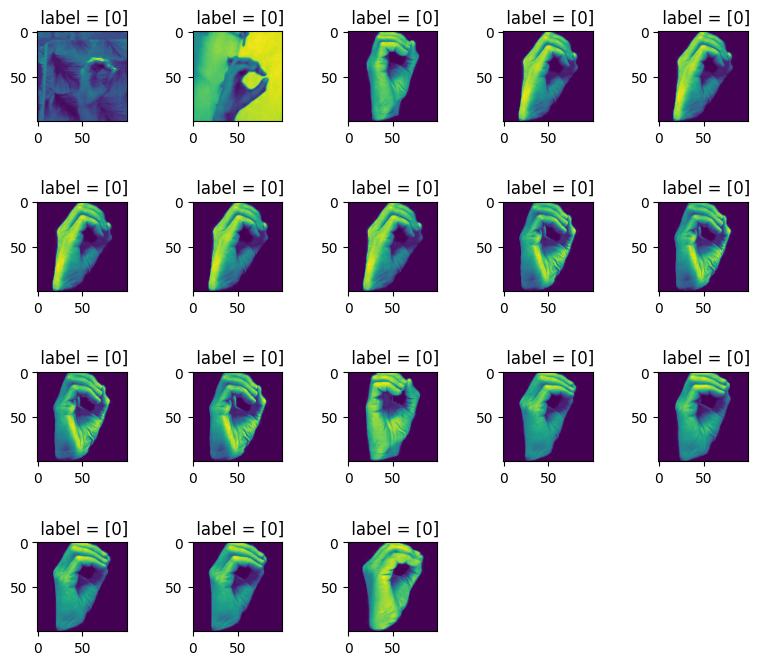

In [39]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
columns = 5
rows = 5
for i in range(1, 19):
    img = data_batch[i]
    ax = fig.add_subplot(rows, columns, i)
    plt.subplots_adjust(hspace=0.9, wspace=0.01)
    label = np.where(label_batch[i] == 1)
    ax.title.set_text(" label = " + str(label[0]))
    plt.imshow(img)
plt.show()

In [76]:
from keras import models, layers

network = models.Sequential()

network.add(layers.Conv2D(32, (4,4), activation='relu', input_shape=(100, 100, 1)))
network.add(layers.MaxPool2D((1,1)))
network.add(layers.Flatten())
network.add(layers.Dense(128, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 97, 97, 32)        544       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 97, 97, 32)       0         
 g2D)                                                            
                                                                 
 flatten_11 (Flatten)        (None, 301088)            0         
                                                                 
 dense_22 (Dense)            (None, 128)               38539392  
                                                                 
 dense_23 (Dense)            (None, 10)                1290      
                                                                 
Total params: 38,541,226
Trainable params: 38,541,226
Non-trainable params: 0
_________________________________________

In [77]:
from keras import optimizers

network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

history = network.fit(train_data, train_labels, epochs=9, batch_size=18)

Epoch 1/9
108/108 [==============================] - 36s 326ms/step - loss: 4.9850 - accuracy: 0.3152
Epoch 2/9
108/108 [==============================] - 35s 326ms/step - loss: 0.8909 - accuracy: 0.7247
Epoch 3/9
108/108 [==============================] - 35s 326ms/step - loss: 0.3568 - accuracy: 0.8984
Epoch 4/9
108/108 [==============================] - 35s 326ms/step - loss: 0.1596 - accuracy: 0.9627
Epoch 5/9
108/108 [==============================] - 35s 326ms/step - loss: 0.0751 - accuracy: 0.9865
Epoch 6/9
108/108 [==============================] - 35s 325ms/step - loss: 0.0515 - accuracy: 0.9902
Epoch 7/9
108/108 [==============================] - 35s 325ms/step - loss: 0.0211 - accuracy: 0.9969
Epoch 8/9
108/108 [==============================] - 35s 326ms/step - loss: 0.0125 - accuracy: 0.9984
Epoch 9/9
108/108 [==============================] - 35s 326ms/step - loss: 0.0034 - accuracy: 1.0000


In [78]:
train_accuracy = history.history['accuracy']
print('Train Accuracy:\n', train_accuracy)

train_loss = history.history['loss']
print('\nTrain Loss:\n', train_loss)

epochs = range(1,len(train_accuracy)+1)

Train Accuracy:
 [0.3151892125606537, 0.7247278094291687, 0.8983929753303528, 0.9626749753952026, 0.9865215420722961, 0.9901503324508667, 0.996889591217041, 0.9984447956085205, 1.0]

Train Loss:
 [4.984976768493652, 0.8908530473709106, 0.3568265438079834, 0.1595885455608368, 0.07514313608407974, 0.051494061946868896, 0.021089952439069748, 0.012545803561806679, 0.003444206900894642]


In [79]:
test_loss, test_accuracy = network.evaluate(test_data, test_labels)

9/9 [==============================] - 0s 38ms/step - loss: 0.7734 - accuracy: 0.8362


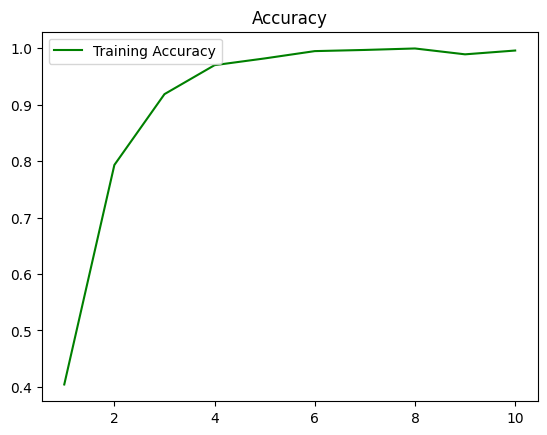

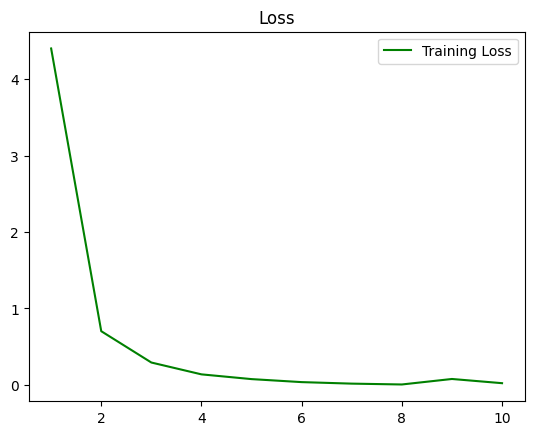

In [75]:
plt.plot(epochs, train_accuracy, 'g', label='Training Accuracy')
plt.title('Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, train_loss, 'g', label='Training Loss')
plt.title('Loss')
plt.legend()

plt.show()